# Elo Ratings

Note: I will add some more documentation later. This notebook is still a work in progress :)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

INITIAL_STD = 100

In [2]:
def gaussian(mean: float, std: float, xs: np.ndarray) -> np.ndarray:
    ys = np.exp(-((xs - mean)**2) / (2*(std**2))) / (std * np.sqrt(2 * np.pi))
    return ys

In [3]:
mean_score_a = 1100
xs = np.linspace(start=500, stop=1500, num=1001)
score_distribution_a = gaussian(mean=mean_score_a, std=INITIAL_STD, xs=xs)

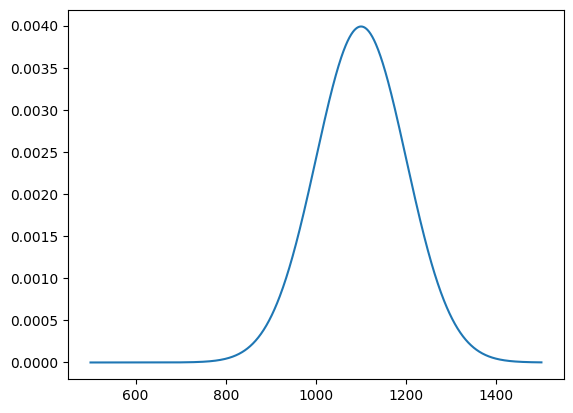

In [4]:
plt.plot(xs, score_distribution_a)
plt.show()

In [5]:
def discretize_distribution(bin_size: int, xs: np.ndarray, score_distribution: np.ndarray):
    xs = xs.tolist()
    score_distribution = score_distribution.tolist()

    idx = 1

    new_xs = []
    new_ys = []

    while idx < len(xs):
        new_xs.append(xs[idx])

        integrated_score = 0
        total_dx = 0
        while total_dx < bin_size:
            dx = xs[idx] - xs[idx - 1]
            total_dx += dx
            integrated_score += score_distribution[idx] * dx

            idx += 1

        new_ys.append(integrated_score)

    new_xs = np.array(new_xs) + 0.5 * bin_size
    new_ys = np.array(new_ys)
    return new_xs, new_ys

In [6]:
new_xs, new_ys = discretize_distribution(bin_size=50, xs=xs, score_distribution=score_distribution_a)

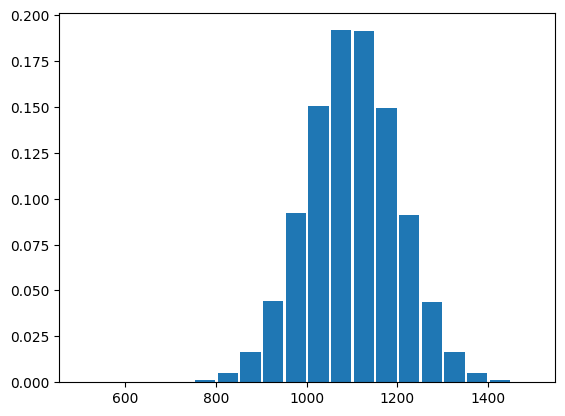

0.999968992431114 should still be approximately equal to 1


In [7]:
plt.bar(new_xs, new_ys, width=45, align='center')
plt.show()

print(f'{new_ys.sum()} should still be approximately equal to 1')

In [8]:
def expected_outcome_of_win_for_b(mean_score_a: int, std_a: int, score_b: int) -> float:
    '''
    An expected outcome of 1 means that player b will always win from player a. An expected
    outcome of 0 mean that player b will always lose from player a.
    '''
    xs = np.linspace(start=500, stop=1500, num=1001)
    score_distribution_a = gaussian(mean=mean_score_a, std=std_a, xs=xs)
    new_xs, scores_a = discretize_distribution(bin_size=50, xs=xs, score_distribution=score_distribution_a)

    losses_for_a = new_xs < score_b
    expected_outcome = (losses_for_a * scores_a).sum()
    return expected_outcome

In [9]:
test_scores = [900, 1000, 1100, 1200, 1300]
for score_b in test_scores:
    print(f'Elo of {score_b} against {mean_score_a} has a probability of ' + 
        f'winning of: {round(expected_outcome_of_win_for_b(mean_score_a=mean_score_a, std_a=INITIAL_STD, score_b=score_b), 2)}')

Elo of 900 against 1100 has a probability of winning of: 0.02
Elo of 1000 against 1100 has a probability of winning of: 0.16
Elo of 1100 against 1100 has a probability of winning of: 0.5
Elo of 1200 against 1100 has a probability of winning of: 0.84
Elo of 1300 against 1100 has a probability of winning of: 0.98
